<a href="https://colab.research.google.com/github/ashritamahadevu/Sentiment-testing/blob/main/testing_of_Testing_ALL_CRYPTO_Sentiment_Score_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO:

filter for comments by day/other time period
use d/dx sentiment or sentiment''

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import seaborn as sns

from sklearn.linear_model import LinearRegression
pd.options.mode.copy_on_write = True

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Sentiment Phase 2/Data Processing/Processed_CryptoCurrency_comments_1.csv")
df2 = pd.read_csv("/content/drive/My Drive/Sentiment Phase 2/Data Processing/Processed_CryptoCurrency_comments_2.csv")
df3 = pd.read_csv("/content/drive/My Drive/Sentiment Phase 2/Data Processing/Processed_CryptoCurrency_comments_3.csv")
df4 = pd.read_csv("/content/drive/My Drive/Sentiment Phase 2/Data Processing/Processed_CryptoCurrency_comments_4.csv")
df5 = pd.read_csv("/content/drive/My Drive/Sentiment Phase 2/Data Processing/Processed_CryptoCurrency_comments_5.csv")
df6 = pd.read_csv("/content/drive/My Drive/Sentiment Phase 2/Data Processing/Processed_CryptoCurrency_comments_6.csv")

df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)
df.head()

Upvotes        Date            User  \
0        6  2019-01-01      u/ronnie_s   
1       13  2019-01-01      u/CarsonS9   
2        4  2019-01-01  u/BattleCheffy   
3        5  2019-01-01   u/amorazputin   
4        1  2019-01-01        u/Robswc   

                                        Comment Link  \
0  https://www.reddit.com/r/CryptoCurrency/commen...   
1  https://www.reddit.com/r/CryptoCurrency/commen...   
2  https://www.reddit.com/r/CryptoCurrency/commen...   
3  https://www.reddit.com/r/CryptoCurrency/commen...   
4  https://www.reddit.com/r/CryptoCurrency/commen...   

                                                Body BTC_USD ETH_USD ADA_USD  \
0  Thanks for the list but it bears mentioning..\...     Yes      No      No   
1  Stupid XRP bagholders getting taken to the cle...      No      No      No   
2  Ok so bitcoins candle is down 5 mos.    What d...     Yes      No      No   
3  rooting for ya\n\n\nhope you take your winning...     Yes      No      No   
4  For now I would just stick to bitcoin, alts fo...     Yes      No      No   

  XRP_USD SOL_USD BNB_USD DOGE_USD       Pos  
0      No      No      No       No -0.043114  
1     Yes      No      No       No -0.483572  
2      No      No      No       No -0.296047  
3      No      No      No       No  0.477733  
4      No      No      No       No  0.072028

In [ ]:

sentiment_data_df = {}

comment_volume_data_df = {}

tickers = []


df.columns = ["Upvotes", "Date", "User", "Comment Link", "Body", "BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD", "DOGE-USD", "Pos"]
cur_tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD"] #"DOGE-USD"

tickers.extend(cur_tickers)
print(df)

for stock in cur_tickers:
    stock_data = df[df[stock] == "Yes"]

    sentiment_data_df[stock] = stock_data[['Date', 'Pos']]


         Upvotes        Date                 User  \
0              6  2019-01-01           u/ronnie_s   
1             13  2019-01-01           u/CarsonS9   
2              4  2019-01-01       u/BattleCheffy   
3              5  2019-01-01        u/amorazputin   
4              1  2019-01-01             u/Robswc   
...          ...         ...                  ...   
4330515        1  2024-12-31  u/critiqueextension   
4330516        2  2024-12-31         u/TheDoge420   
4330517        8  2024-12-31      u/coinfeeds-bot   
4330518        3  2024-12-31          u/shevagleb   
4330519       18  2024-12-31       u/Lord-Nagafen   

                                              Comment Link  \
0        https://www.reddit.com/r/CryptoCurrency/commen...   
1        https://www.reddit.com/r/CryptoCurrency/commen...   
2        https://www.reddit.com/r/CryptoCurrency/commen...   
3        https://www.reddit.com/r/CryptoCurrency/commen...   
4        https://www.reddit.com/r/CryptoCurrency/comm

In [ ]:
pip install --upgrade yfinance

In [ ]:
# get the stock data
import yfinance as yf
print(len(tickers))
stock_data_df = {}
new_tickers = []
for stock in tickers:
    download = yf.download(stock,progress=False,ignore_tz =True)
    if not download.empty:
        stock_data_df[stock] = download

#tickers = new_tickers

print(stock_data_df)

6


/tmp/ipython-input-7-2563925358.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(stock,progress=False,ignore_tz =True)
/tmp/ipython-input-7-2563925358.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(stock,progress=False,ignore_tz =True)
/tmp/ipython-input-7-2563925358.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(stock,progress=False,ignore_tz =True)
/tmp/ipython-input-7-2563925358.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(stock,progress=False,ignore_tz =True)
/tmp/ipython-input-7-2563925358.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(stock,progress=False,ignore_tz =True)
/tmp/ipython-input-7-2563925358.py:7: FutureWarning: YF.download() has changed argument auto_adjust defau

{'BTC-USD': Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2014-09-17     457.334015     468.174011     452.421997     465.864014   
2014-09-18     424.440002     456.859985     413.104004     456.859985   
2014-09-19     394.795990     427.834991     384.532013     424.102997   
2014-09-20     408.903992     423.295990     389.882996     394.673004   
2014-09-21     398.821014     412.425995     393.181000     408.084991   
...                   ...            ...            ...            ...   
2025-06-17  104601.117188  107750.195312  103396.531250  106794.117188   
2025-06-18  104883.328125  105581.851562  103602.265625  104602.070312   
2025-06-19  104684.289062  105250.890625  103940.773438  104886.773438   
2025-06-20  103309.601562  106539.382812  102372.210938  104681.031250   
2025-06-22  102884.906250 

Reformatting both data & sentiment into one dataframe (DAILY)

In [ ]:
# tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD"] #"DOGE-USD"
# for ticker in tickers:
#   df_company = pd.DataFrame(sentiment_data_df[ticker])
#   df_company['Date'] = pd.to_datetime(df_company['Date'])
#   df_company = df_company[(df_company['Date'] >= "2020-01-01") & (df_company['Date']< "2021-01-01")]
#   print("below is", ticker, "daily comments")
#   print(df_company.value_counts("Date"))
#   print()

/tmp/ipython-input-31-3093021773.py:38: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


BTC-USD crypto correlation graphs


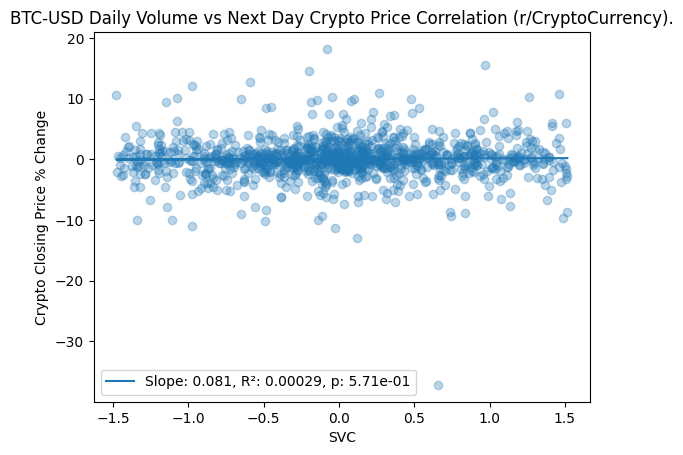

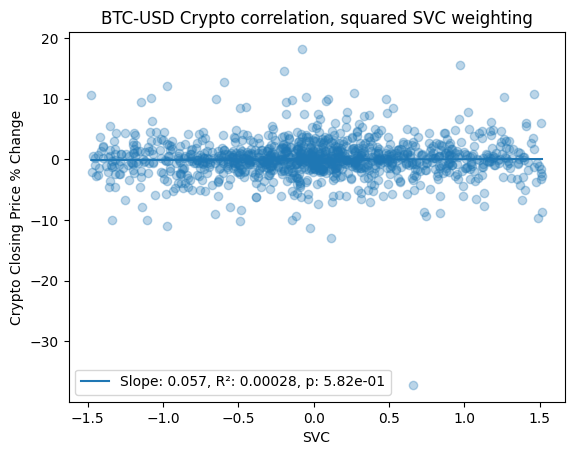

/tmp/ipython-input-31-3093021773.py:38: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


ETH-USD crypto correlation graphs


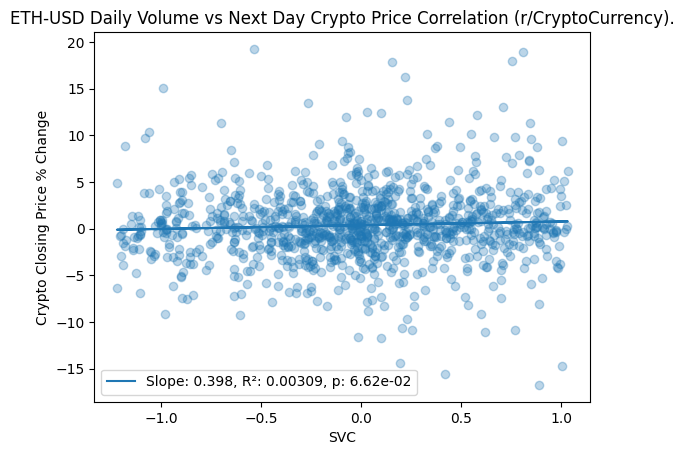

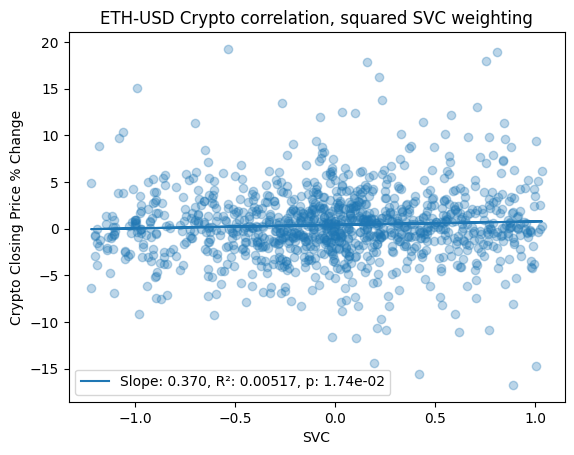






ADA-USD crypto correlation graphs


/tmp/ipython-input-31-3093021773.py:38: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


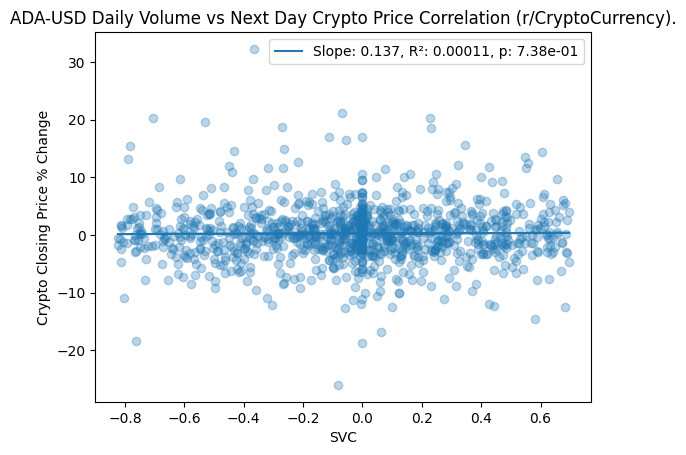

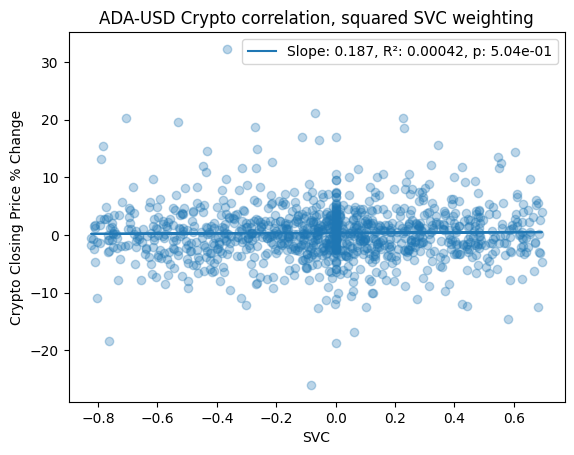






XRP-USD crypto correlation graphs


/tmp/ipython-input-31-3093021773.py:38: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


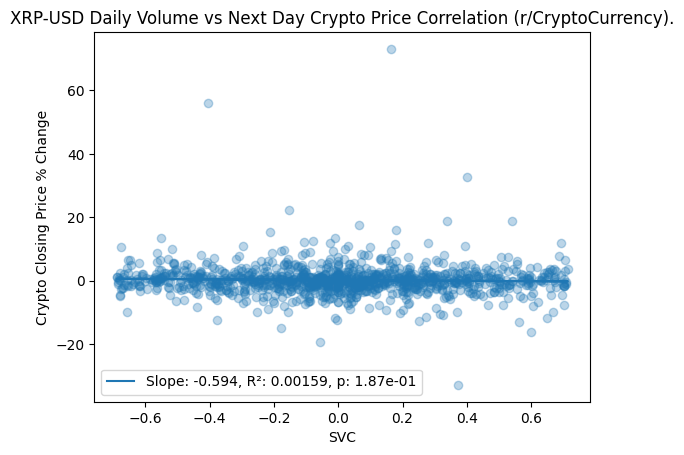

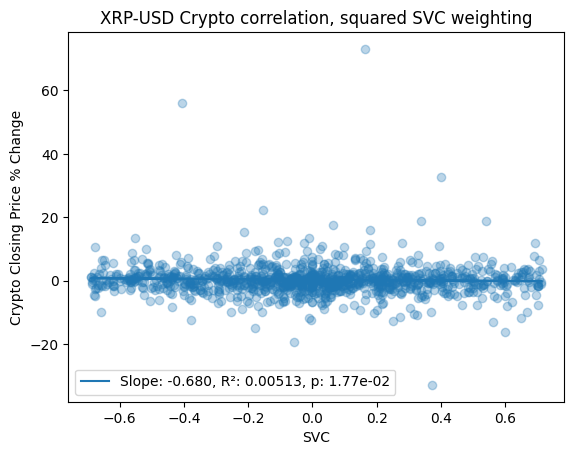






SOL-USD crypto correlation graphs


/tmp/ipython-input-31-3093021773.py:38: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


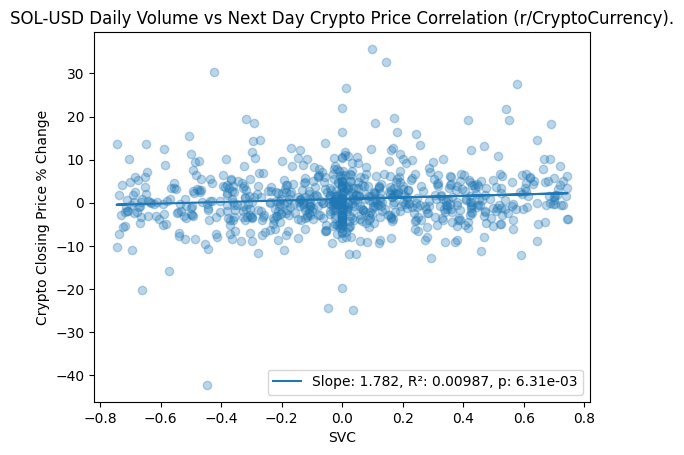

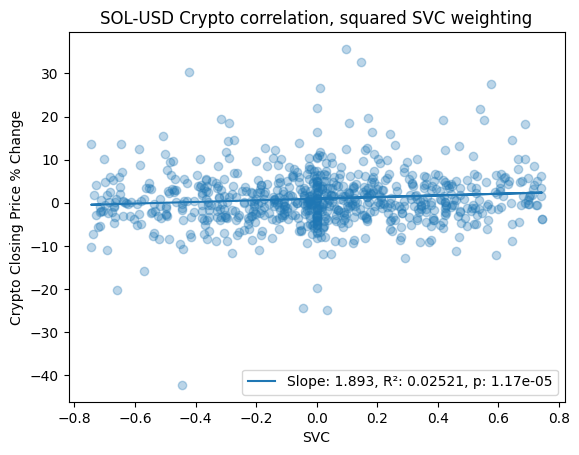






BNB-USD crypto correlation graphs


/tmp/ipython-input-31-3093021773.py:38: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


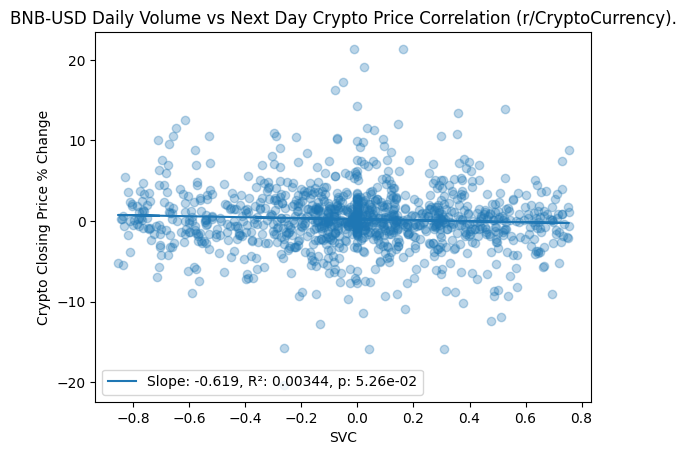

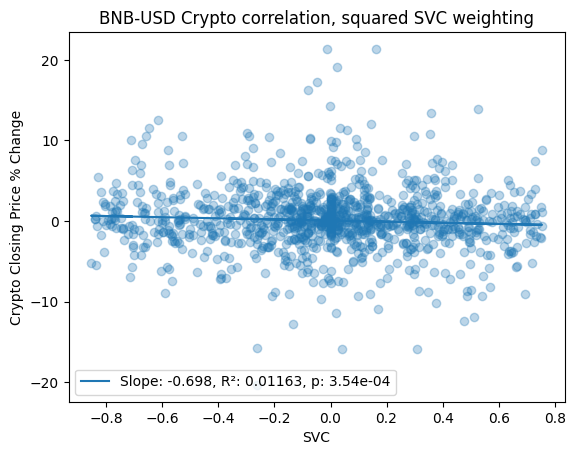

In [ ]:
#SVC - change from previous day
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t
import scipy.stats as sp
from scipy.stats.mstats import winsorize



tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD"] #"DOGE-USD"
final_svc_vs_stock_df = pd.DataFrame()


for ticker in tickers:
  df_company = pd.DataFrame(sentiment_data_df[ticker])
  df_company['Date'] = pd.to_datetime(df_company['Date'])
  df_daily_sentiment = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].mean().reset_index()
  df_daily_sentiment['Pos_diff'] = df_daily_sentiment['Pos'].diff()
  df_daily_sentiment["Pos_diff"] = df_daily_sentiment['Pos_diff']

  df_daily_size = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].size().reset_index()
  df_daily_size['Volume_diff'] = df_daily_size['Pos'].diff()
  df_daily_size["Volume_diff"] = df_daily_size['Volume_diff']

  df_svc = pd.merge(
      df_daily_sentiment[['Date', 'Pos_diff']],
      df_daily_size[['Date', 'Pos', 'Volume_diff']]
  )
  # df_svc = df_svc[df_svc['Pos'] > 100] adding min volume doesnt seem to improve correlation at all
  df_svc['SVC'] = (df_svc["Pos_diff"]) * abs(df_svc['Volume_diff'])



  df_daily_close = pd.DataFrame(stock_data_df[ticker].iloc[:,0]).reset_index()
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100
  df_daily_close.columns = ['Date', 'Close', 'Close_pct_change']



  svc_vs_stock_df = pd.merge(
      df_svc[['Date', 'SVC']],
      df_daily_close[['Date', 'Close_pct_change']],
      on='Date',
      how='inner'
  )
  svc_vs_stock_df['Ticker'] = ticker

  svc_vs_stock_df = svc_vs_stock_df[(svc_vs_stock_df['Date'] >= "2019-01-01") & (svc_vs_stock_df['Date'] <= "2024-12-31")].dropna()

  #outlier filtering
  Q1 = svc_vs_stock_df['SVC'].quantile(0.25)
  Q3 = svc_vs_stock_df['SVC'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 #- 1.5*IQR
  upper_bound = Q3 #+ 1.5*IQR
  svc_vs_stock_df = svc_vs_stock_df[(svc_vs_stock_df['SVC'] >= lower_bound) & (svc_vs_stock_df['SVC'] <= upper_bound)]

  # svc_vs_stock_df = svc_vs_stock_df.dropna(subset=['SVC', 'Close_pct_change'])
  # svc_vs_stock_df['SVC'] = winsorize(svc_vs_stock_df['SVC'], limits=[0.01, 0.01])




  final_svc_vs_stock_df = pd.concat([final_svc_vs_stock_df, svc_vs_stock_df], ignore_index=True)




  print(f'{ticker} crypto correlation graphs')

  x_values = svc_vs_stock_df[['SVC']]
  y_values = svc_vs_stock_df['Close_pct_change']

  model = LinearRegression()
  model.fit(x_values, y_values)

  slope = round(model.coef_[0], 3)
  y_pred = model.predict(x_values)
  r_squared = round(r2_score(y_values, y_pred), 5)

  _, p = sp.pearsonr(svc_vs_stock_df['SVC'], svc_vs_stock_df['Close_pct_change'])
  p = f"{p:.2e}"

  plt.scatter(svc_vs_stock_df['SVC'], svc_vs_stock_df['Close_pct_change'], alpha=0.3)
  plt.plot(svc_vs_stock_df['SVC'], y_pred, label=f'Slope: {slope}, R²: {r_squared}, p: {p}')

  plt.xlabel('SVC')
  plt.ylabel('Crypto Closing Price % Change')
  plt.title(f'{ticker} Daily Volume vs Next Day Crypto Price Correlation (r/CryptoCurrency).')

  plt.legend()
  plt.show()



  # weights = (svc_vs_stock_df['SVC'] ** 2).values #quadratic weighting

  # SVC = svc_vs_stock_df['SVC']
  # weights = (SVC ** 2) / (1 + np.abs(SVC))
  # weights = weights.values

  SVC = svc_vs_stock_df['SVC']
  weights = np.tanh(SVC) ** 2
  weights = weights.values






  model = LinearRegression()
  model.fit(x_values, y_values, sample_weight=weights)

  slope = model.coef_[0]
  intercept = model.intercept_
  y_pred = model.predict(x_values)

  #have to manually calculate the p-value - python library can't handle weights with p-value
  residuals = y_values - y_pred
  weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
  weighted_variance = np.sum(weights * (x_values.values.flatten() - np.average(x_values.values.flatten(), weights=weights))**2)
  se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
  t_statistic = slope / se_slope
  df = len(x_values) - 2
  p = 2 * (1 - t.cdf(np.abs(t_statistic), df))

  r_squared = r2_score(y_values, y_pred, sample_weight=weights)

  plt.scatter(x_values, y_values, alpha=0.3)
  plt.plot(x_values, y_pred, label=f'Slope: {slope:.3f}, R²: {r_squared:.5f}, p: {p:.2e}')
  plt.xlabel('SVC')
  plt.ylabel('Crypto Closing Price % Change')
  plt.title(f'{ticker} Crypto correlation, squared SVC weighting')
  plt.legend()
  plt.show()

  print("\n\n\n\n")


final_svc_vs_stock_df = final_svc_vs_stock_df.dropna()


           Date   Pos_avg  Volume        SVC
0    2019-01-01 -0.090622     281 -25.464798
1    2019-01-02 -0.081488     447 -36.425026
2    2019-01-03 -0.102780     487 -50.053977
3    2019-01-04 -0.057352     340 -19.499707
4    2019-01-05 -0.105754     303 -32.043460
...         ...       ...     ...        ...
2187 2024-12-27 -0.056934     383 -21.805881
2188 2024-12-28 -0.043386     356 -15.445445
2189 2024-12-29 -0.068230     296 -20.196042
2190 2024-12-30 -0.043939     493 -21.661818
2191 2024-12-31 -0.022736     247  -5.615713

[2192 rows x 4 columns]
BTC-USD crypto correlation graphs


/tmp/ipython-input-10-1220177024.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


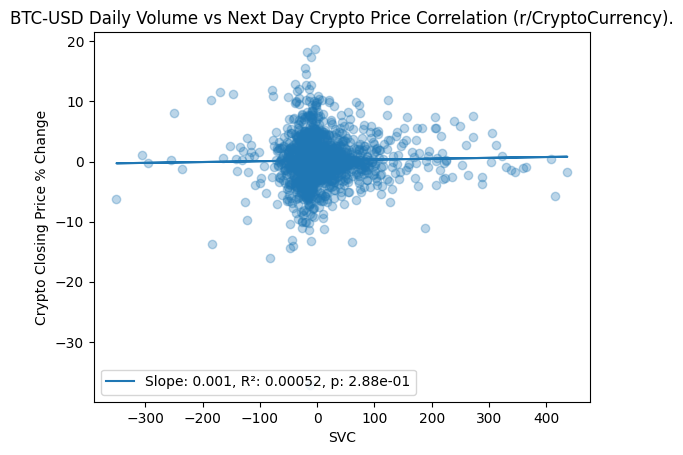

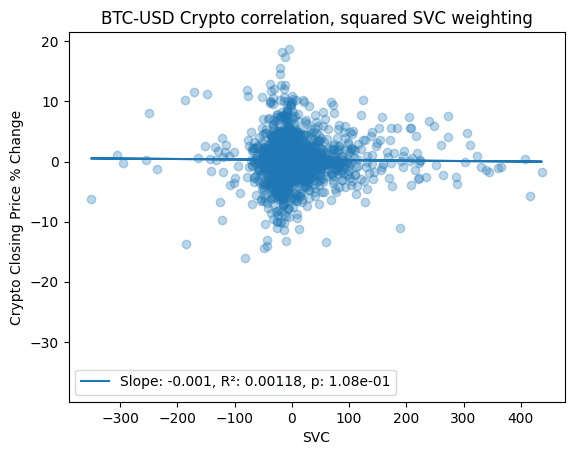






           Date   Pos_avg  Volume       SVC
0    2019-01-01 -0.049501      76 -3.762105
1    2019-01-02 -0.018603     168 -3.125228
2    2019-01-03 -0.032826     125 -4.103227
3    2019-01-04  0.015851     137  2.171594
4    2019-01-05 -0.005383      83 -0.446827
...         ...       ...     ...       ...
2187 2024-12-27 -0.028542     125 -3.567740
2188 2024-12-28 -0.026976     144 -3.884568
2189 2024-12-29 -0.006274     141 -0.884585
2190 2024-12-30 -0.027932     221 -6.172887
2191 2024-12-31 -0.024072      81 -1.949827

[2192 rows x 4 columns]
ETH-USD crypto correlation graphs


/tmp/ipython-input-10-1220177024.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


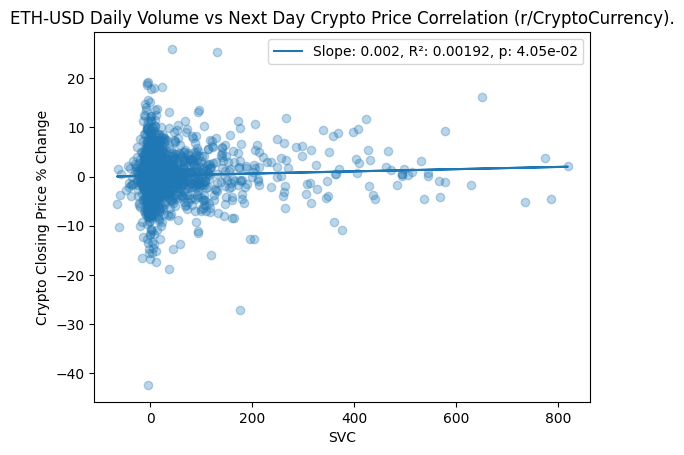

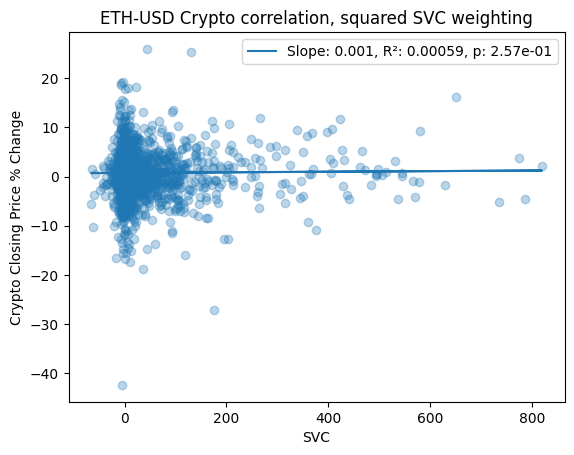






           Date   Pos_avg  Volume       SVC
0    2019-01-01  0.223219       8  1.785754
1    2019-01-02  0.030342      25  0.758554
2    2019-01-03 -0.109292       9 -0.983626
3    2019-01-04 -0.144402       5 -0.722012
4    2019-01-05  0.129766      10  1.297661
...         ...       ...     ...       ...
2187 2024-12-27  0.054780      54  2.958095
2188 2024-12-28 -0.018394      26 -0.478239
2189 2024-12-29 -0.038273      31 -1.186468
2190 2024-12-30 -0.011622      24 -0.278927
2191 2024-12-31  0.023442      15  0.351624

[2192 rows x 4 columns]
ADA-USD crypto correlation graphs


/tmp/ipython-input-10-1220177024.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


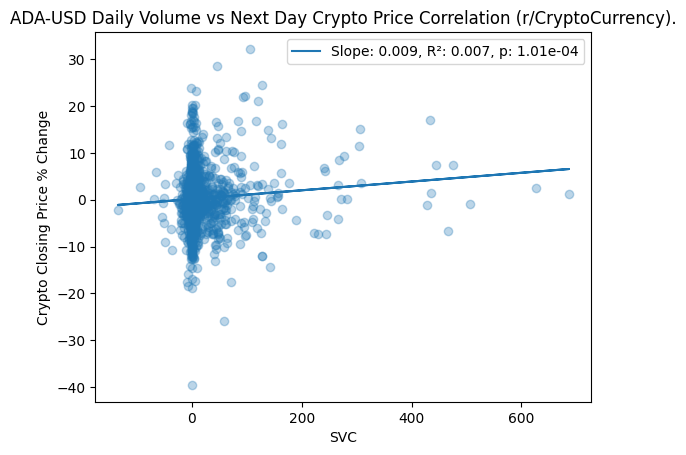

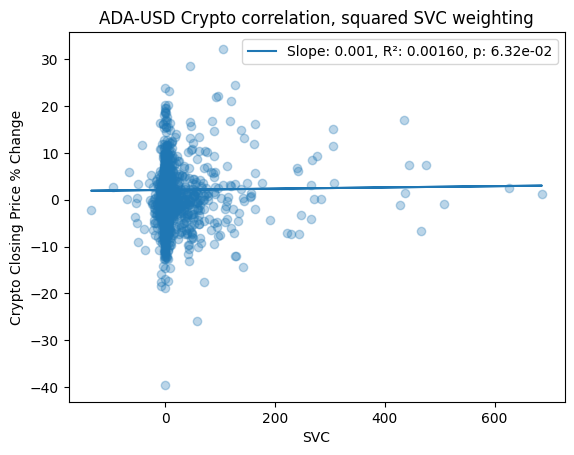






           Date   Pos_avg  Volume        SVC
0    2019-01-01 -0.056861      72  -4.094015
1    2019-01-02 -0.120938     313 -37.853689
2    2019-01-03 -0.121464      62  -7.530765
3    2019-01-04 -0.101407      64  -6.490049
4    2019-01-05 -0.070735      57  -4.031877
...         ...       ...     ...        ...
2187 2024-12-27 -0.037783      21  -0.793445
2188 2024-12-28 -0.007395      30  -0.221855
2189 2024-12-29 -0.137173      17  -2.331934
2190 2024-12-30 -0.040937      19  -0.777794
2191 2024-12-31  0.060449      11   0.664934

[2192 rows x 4 columns]
XRP-USD crypto correlation graphs


/tmp/ipython-input-10-1220177024.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


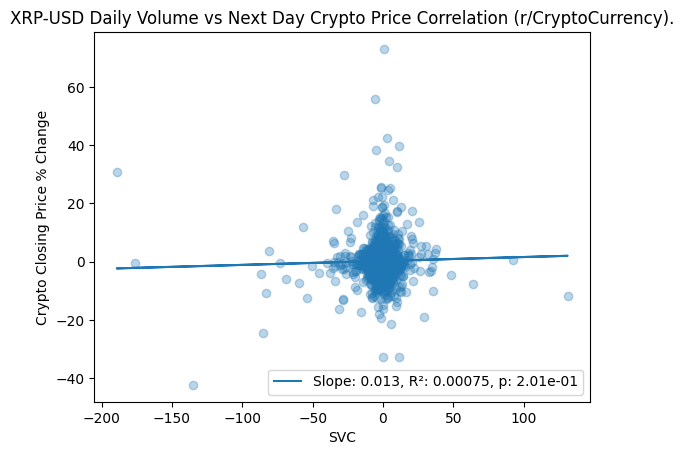

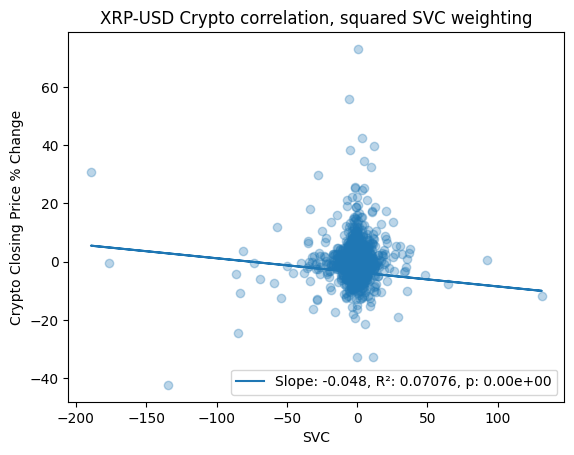






           Date   Pos_avg  Volume       SVC
0    2019-01-08 -0.488951       1 -0.488951
1    2019-01-09       NaN       0       NaN
2    2019-01-10       NaN       0       NaN
3    2019-01-11       NaN       0       NaN
4    2019-01-12       NaN       0       NaN
...         ...       ...     ...       ...
2180 2024-12-27 -0.079891      66 -5.272837
2181 2024-12-28 -0.019459      43 -0.836758
2182 2024-12-29  0.030889      27  0.834003
2183 2024-12-30 -0.003179      48 -0.152589
2184 2024-12-31 -0.058251      29 -1.689278

[2185 rows x 4 columns]
SOL-USD crypto correlation graphs


/tmp/ipython-input-10-1220177024.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


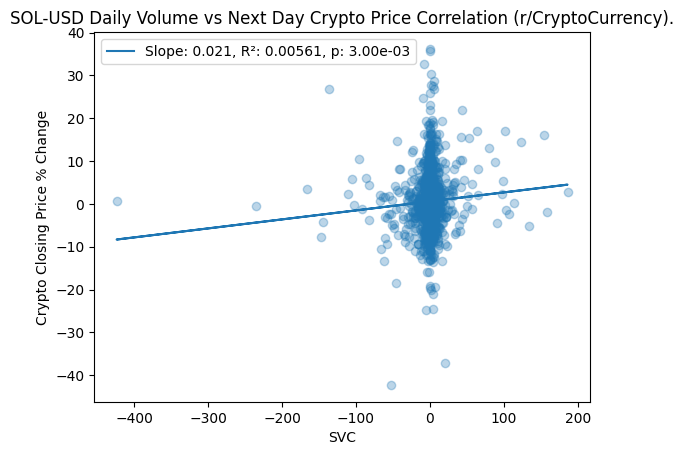

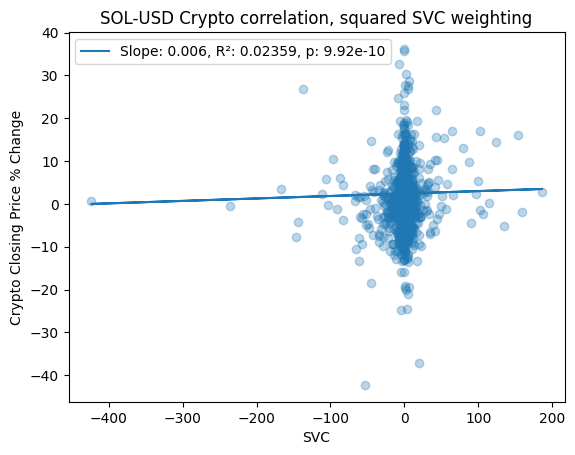






           Date   Pos_avg  Volume       SVC
0    2019-01-01 -0.044647      28 -1.250111
1    2019-01-02 -0.164956      31 -5.113632
2    2019-01-03 -0.041435      15 -0.621522
3    2019-01-04 -0.019624      22 -0.431737
4    2019-01-05 -0.080575      41 -3.303573
...         ...       ...     ...       ...
2187 2024-12-27 -0.068079      14 -0.953109
2188 2024-12-28  0.036890      33  1.217361
2189 2024-12-29  0.026856      23  0.617678
2190 2024-12-30 -0.114970      28 -3.219159
2191 2024-12-31 -0.041658      11 -0.458234

[2192 rows x 4 columns]
BNB-USD crypto correlation graphs


/tmp/ipython-input-10-1220177024.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


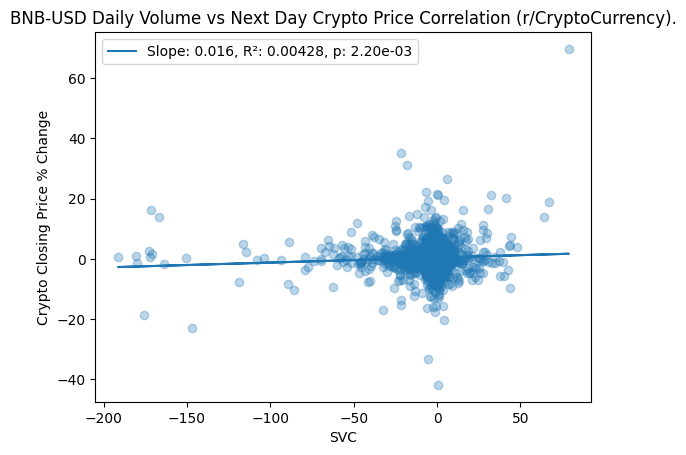

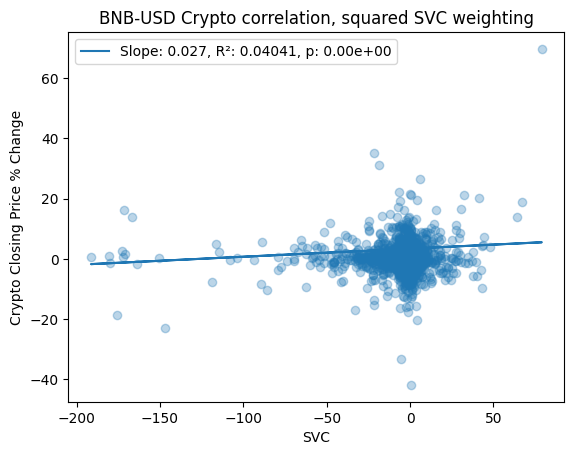

In [ ]:
#testing out non-SVC metrics: weighted sentiment volume - just looking at current day
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t
import scipy.stats as sp


tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD"] #"DOGE-USD"
final_svc_vs_stock_df = pd.DataFrame()


for ticker in tickers:
  df_company = pd.DataFrame(sentiment_data_df[ticker])
  df_company['Date'] = pd.to_datetime(df_company['Date'])
  df_daily_sentiment = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].mean().reset_index()
  df_daily_sentiment['Pos_avg'] = df_daily_sentiment['Pos']

  df_daily_size = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].size().reset_index()
  df_daily_size['Volume'] = df_daily_size['Pos']

  df_svc = pd.merge(
      df_daily_sentiment[['Date', 'Pos_avg']],
      df_daily_size[['Date', 'Volume']]
  )
  # df_svc = df_svc[df_svc['Pos'] > 100] adding min volume doesnt seem to improve correlation at all
  df_svc['SVC'] = df_svc["Pos_avg"] * abs(df_svc['Volume'])
  print(df_svc)



  df_daily_close = pd.DataFrame(stock_data_df[ticker].iloc[:,0]).reset_index()
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100
  df_daily_close.columns = ['Date', 'Close', 'Close_pct_change']



  svc_vs_stock_df = pd.merge(
      df_svc[['Date', 'SVC']],
      df_daily_close[['Date', 'Close_pct_change']],
      on='Date',
      how='inner'
  )
  svc_vs_stock_df['Ticker'] = ticker

  svc_vs_stock_df = svc_vs_stock_df[(svc_vs_stock_df['Date'] >= "2019-01-01") & (svc_vs_stock_df['Date'] <= "2024-12-31")].dropna()

  final_svc_vs_stock_df = pd.concat([final_svc_vs_stock_df, svc_vs_stock_df], ignore_index=True)




  print(f'{ticker} crypto correlation graphs')

  x_values = svc_vs_stock_df[['SVC']]
  y_values = svc_vs_stock_df['Close_pct_change']

  model = LinearRegression()
  model.fit(x_values, y_values)

  slope = round(model.coef_[0], 3)
  y_pred = model.predict(x_values)
  r_squared = round(r2_score(y_values, y_pred), 5)

  _, p = sp.pearsonr(svc_vs_stock_df['SVC'], svc_vs_stock_df['Close_pct_change'])
  p = f"{p:.2e}"

  plt.scatter(svc_vs_stock_df['SVC'], svc_vs_stock_df['Close_pct_change'], alpha=0.3)
  plt.plot(svc_vs_stock_df['SVC'], y_pred, label=f'Slope: {slope}, R²: {r_squared}, p: {p}')

  plt.xlabel('SVC')
  plt.ylabel('Crypto Closing Price % Change')
  plt.title(f'{ticker} Daily Volume vs Next Day Crypto Price Correlation (r/CryptoCurrency).')

  plt.legend()
  plt.show()



  weights = (svc_vs_stock_df['SVC'] ** 2).values #quadratic weighting

  model = LinearRegression()
  model.fit(x_values, y_values, sample_weight=weights)

  slope = model.coef_[0]
  intercept = model.intercept_
  y_pred = model.predict(x_values)

  #have to manually calculate the p-value - python library can't handle weights with p-value
  residuals = y_values - y_pred
  weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
  weighted_variance = np.sum(weights * (x_values.values.flatten() - np.average(x_values.values.flatten(), weights=weights))**2)
  se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
  t_statistic = slope / se_slope
  df = len(x_values) - 2
  p = 2 * (1 - t.cdf(np.abs(t_statistic), df))

  r_squared = r2_score(y_values, y_pred, sample_weight=weights)

  plt.scatter(x_values, y_values, alpha=0.3)
  plt.plot(x_values, y_pred, label=f'Slope: {slope:.3f}, R²: {r_squared:.5f}, p: {p:.2e}')
  plt.xlabel('SVC')
  plt.ylabel('Crypto Closing Price % Change')
  plt.title(f'{ticker} Crypto correlation, squared SVC weighting')
  plt.legend()
  plt.show()

  print("\n\n\n\n")


final_svc_vs_stock_df = final_svc_vs_stock_df.dropna()


/tmp/ipython-input-18-4125450752.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


BTC-USD crypto correlation graphs


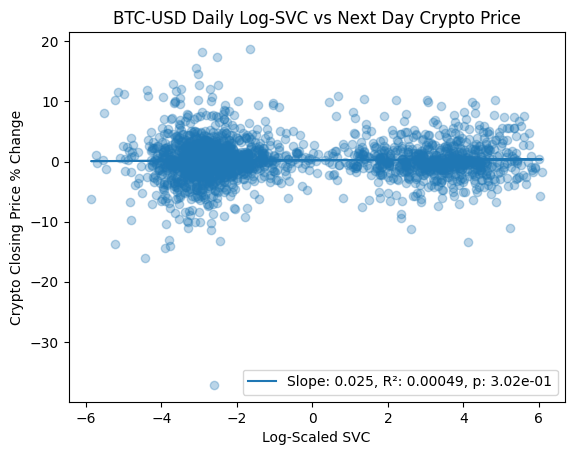

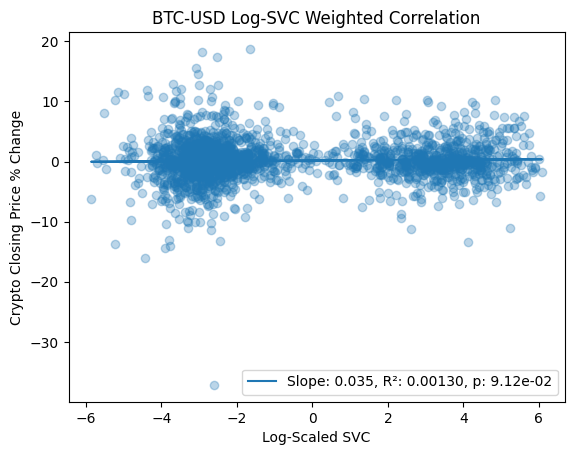

/tmp/ipython-input-18-4125450752.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


ETH-USD crypto correlation graphs


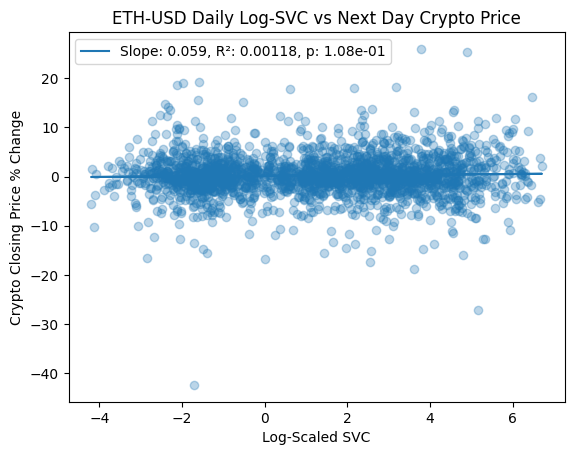

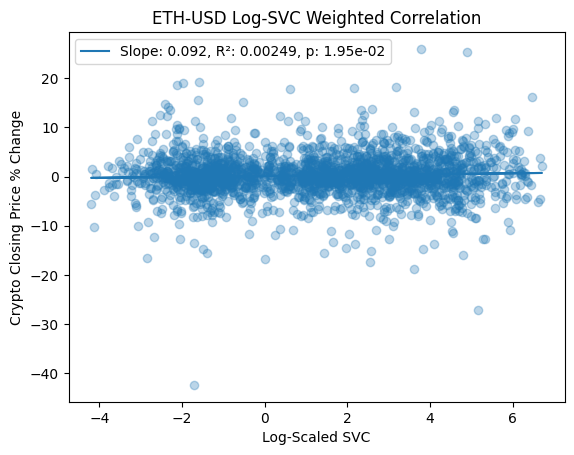






ADA-USD crypto correlation graphs


/tmp/ipython-input-18-4125450752.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


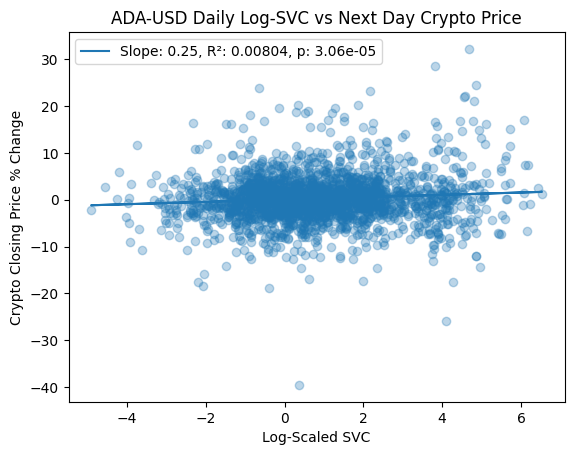

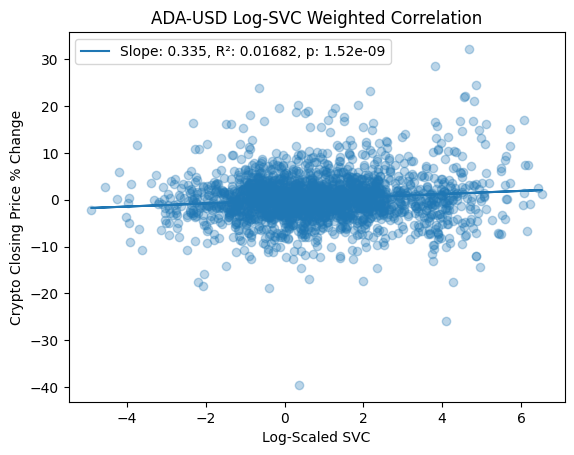






XRP-USD crypto correlation graphs


/tmp/ipython-input-18-4125450752.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


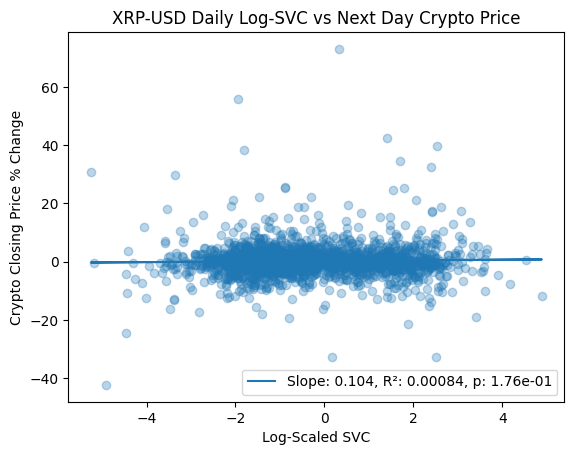

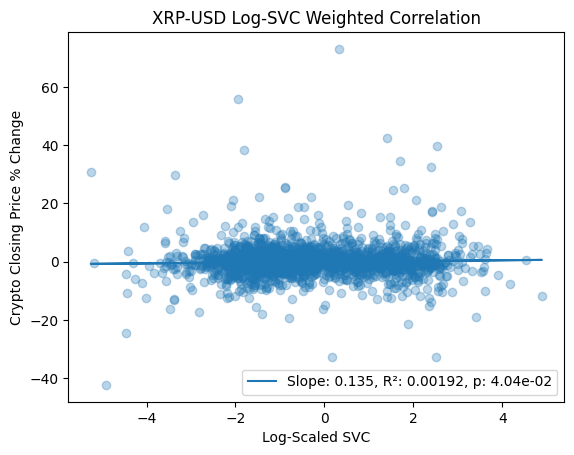






SOL-USD crypto correlation graphs


/tmp/ipython-input-18-4125450752.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


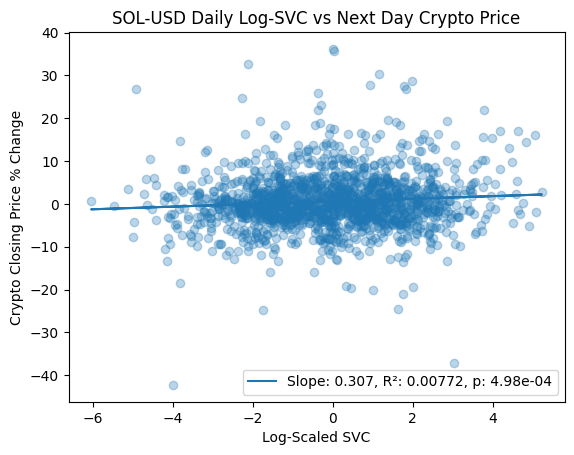

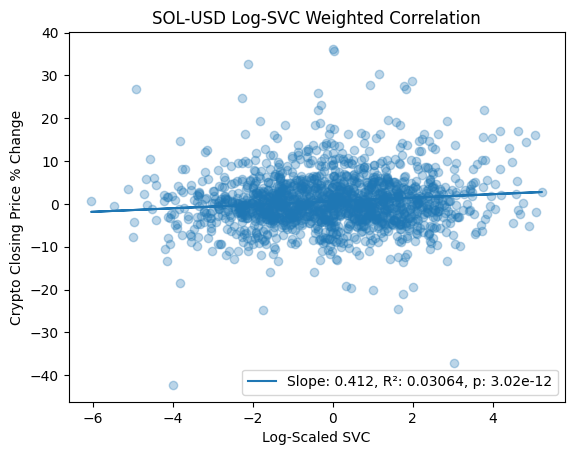






BNB-USD crypto correlation graphs


/tmp/ipython-input-18-4125450752.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


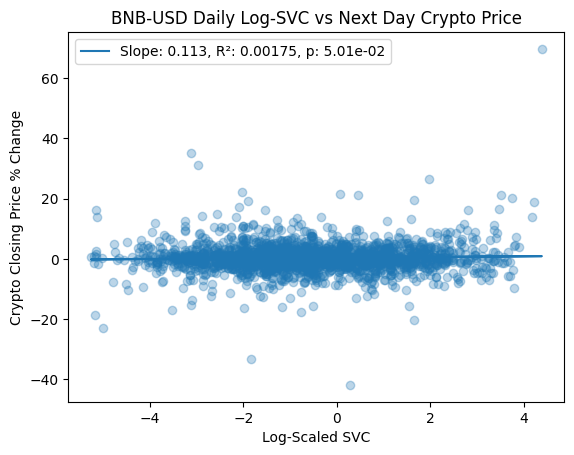

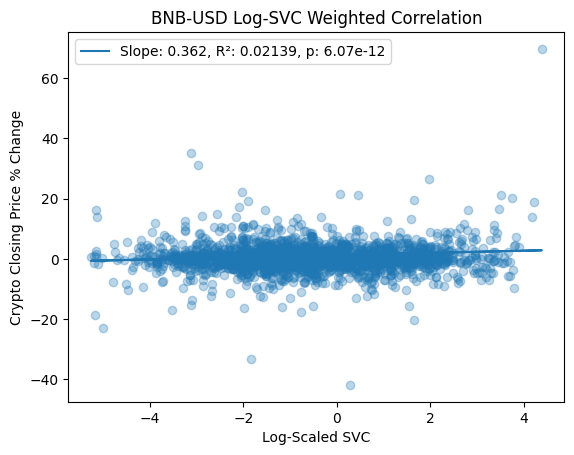

In [ ]:
#data is log scaled: large values compressed, small ones stay the same. reduces impact of outliers w/o removing them complety
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t
import scipy.stats as sp

tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD"]
final_svc_vs_stock_df = pd.DataFrame()

for ticker in tickers:
    df_company = pd.DataFrame(sentiment_data_df[ticker])
    df_company['Date'] = pd.to_datetime(df_company['Date'])

    df_daily_sentiment = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].mean().reset_index()
    df_daily_sentiment['Pos_avg'] = df_daily_sentiment['Pos']

    df_daily_size = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].size().reset_index()
    df_daily_size['Volume'] = df_daily_size['Pos']

    df_svc = pd.merge(
        df_daily_sentiment[['Date', 'Pos_avg']],
        df_daily_size[['Date', 'Volume']]
    )

    df_svc['SVC'] = df_svc["Pos_avg"] * abs(df_svc['Volume'])

    df_svc['SVC_log'] = np.sign(df_svc['SVC']) * np.log1p(abs(df_svc['SVC']))

    df_daily_close = pd.DataFrame(stock_data_df[ticker].iloc[:, 0]).reset_index()
    df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100
    df_daily_close.columns = ['Date', 'Close', 'Close_pct_change']

    svc_vs_stock_df = pd.merge(
        df_svc[['Date', 'SVC_log']],
        df_daily_close[['Date', 'Close_pct_change']],
        on='Date',
        how='inner'
    )

    svc_vs_stock_df['Ticker'] = ticker
    svc_vs_stock_df = svc_vs_stock_df[
        (svc_vs_stock_df['Date'] >= "2019-01-01") & (svc_vs_stock_df['Date'] <= "2024-12-31")
    ].dropna()

    final_svc_vs_stock_df = pd.concat([final_svc_vs_stock_df, svc_vs_stock_df], ignore_index=True)

    print(f'{ticker} crypto correlation graphs')

    x_values = svc_vs_stock_df[['SVC_log']]
    y_values = svc_vs_stock_df['Close_pct_change']

    model = LinearRegression()
    model.fit(x_values, y_values)

    slope = round(model.coef_[0], 3)
    y_pred = model.predict(x_values)
    r_squared = round(r2_score(y_values, y_pred), 5)

    _, p = sp.pearsonr(svc_vs_stock_df['SVC_log'], svc_vs_stock_df['Close_pct_change'])
    p = f"{p:.2e}"

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.plot(x_values, y_pred, label=f'Slope: {slope}, R²: {r_squared}, p: {p}')
    plt.xlabel('Log-Scaled SVC')
    plt.ylabel('Crypto Closing Price % Change')
    plt.title(f'{ticker} Daily Log-SVC vs Next Day Crypto Price')
    plt.legend()
    plt.show()

    weights = (svc_vs_stock_df['SVC_log'] ** 2).values

    model = LinearRegression()
    model.fit(x_values, y_values, sample_weight=weights)

    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(x_values)

    residuals = y_values - y_pred
    weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
    weighted_variance = np.sum(weights * (x_values.values.flatten() - np.average(x_values.values.flatten(), weights=weights))**2)
    se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
    t_statistic = slope / se_slope
    df = len(x_values) - 2
    p = 2 * (1 - t.cdf(np.abs(t_statistic), df))
    r_squared = r2_score(y_values, y_pred, sample_weight=weights)

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.plot(x_values, y_pred, label=f'Slope: {slope:.3f}, R²: {r_squared:.5f}, p: {p:.2e}')
    plt.xlabel('Log-Scaled SVC')
    plt.ylabel('Crypto Closing Price % Change')
    plt.title(f'{ticker} Log-SVC Weighted Correlation')
    plt.legend()
    plt.show()

    print("\n\n\n\n")

final_svc_vs_stock_df = final_svc_vs_stock_df.dropna()

final_svc_vs_stock_df.columns = ['Date', 'SVC', 'Close_pct_change', 'Ticker']


/tmp/ipython-input-23-1963001403.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


BTC-USD crypto correlation graphs


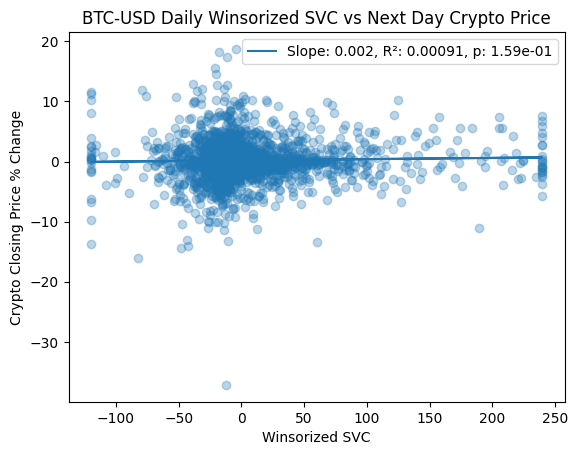

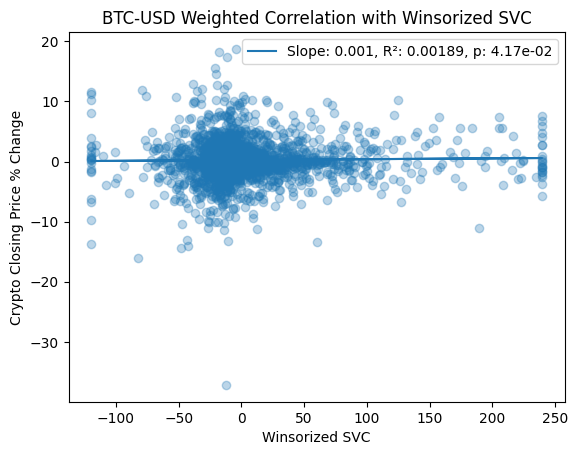

/tmp/ipython-input-23-1963001403.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


ETH-USD crypto correlation graphs


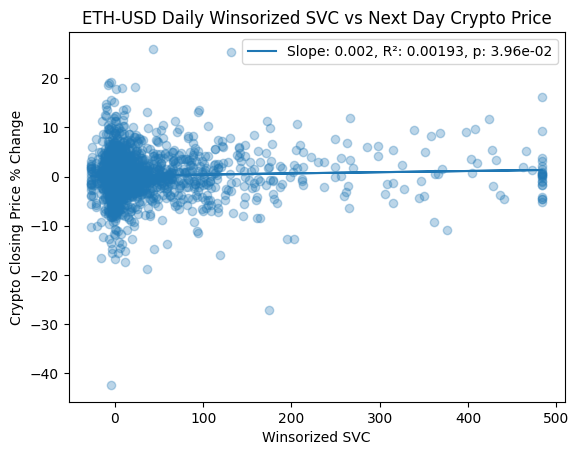

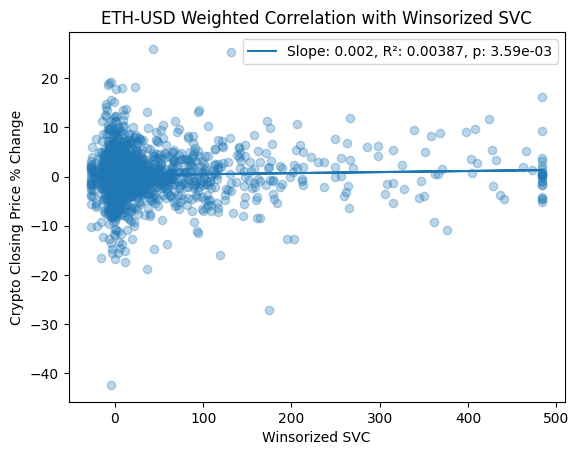






ADA-USD crypto correlation graphs


/tmp/ipython-input-23-1963001403.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


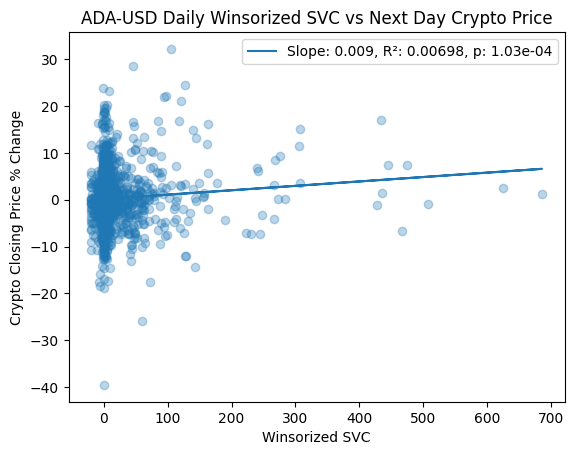

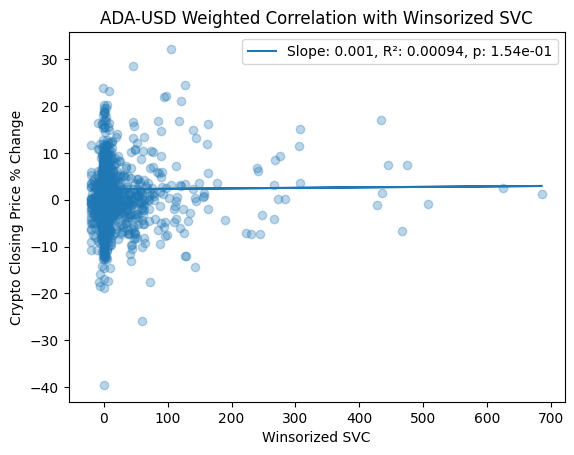






XRP-USD crypto correlation graphs


/tmp/ipython-input-23-1963001403.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


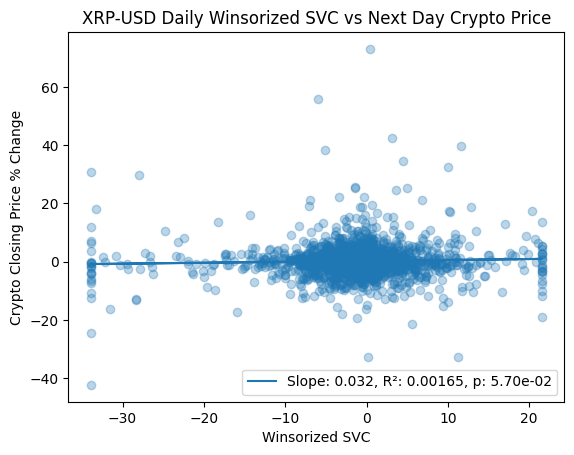

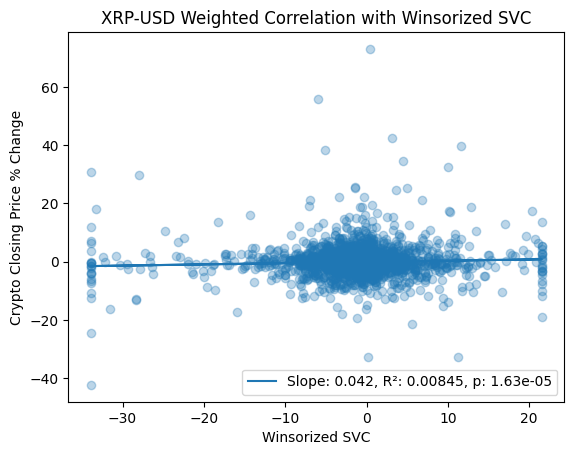






SOL-USD crypto correlation graphs


/tmp/ipython-input-23-1963001403.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


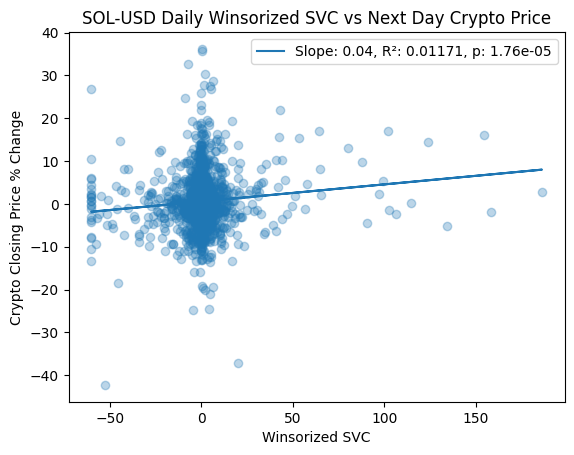

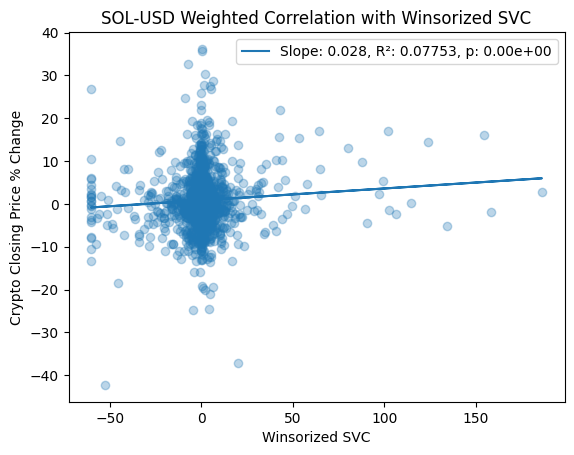






BNB-USD crypto correlation graphs


/tmp/ipython-input-23-1963001403.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100


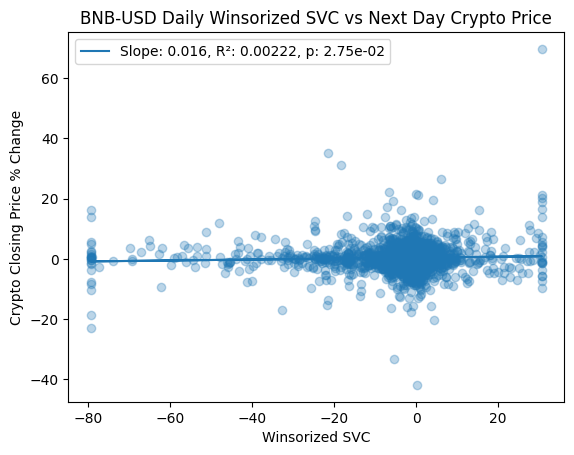

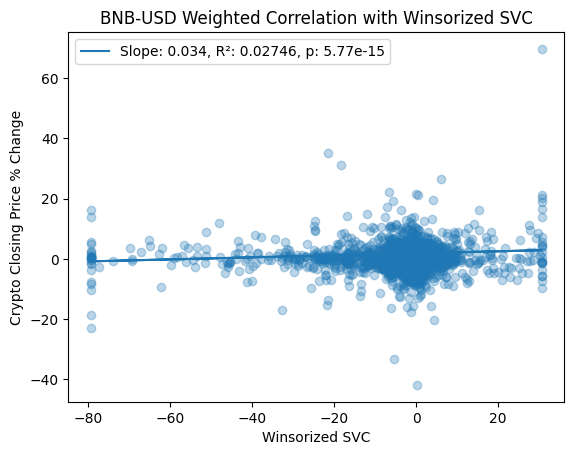

In [ ]:
#winsorization: replaces extreme value w/ data nearest in set percentile range (1%- 99%), all data points kept but outliers have less influence

tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "SOL-USD", "BNB-USD"]
final_svc_vs_stock_df = pd.DataFrame()

for ticker in tickers:
    df_company = pd.DataFrame(sentiment_data_df[ticker])
    df_company['Date'] = pd.to_datetime(df_company['Date'])

    df_daily_sentiment = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].mean().reset_index()
    df_daily_sentiment['Pos_avg'] = df_daily_sentiment['Pos']

    df_daily_size = df_company.groupby(pd.Grouper(key='Date', freq='D'))['Pos'].size().reset_index()
    df_daily_size['Volume'] = df_daily_size['Pos']

    df_svc = pd.merge(
        df_daily_sentiment[['Date', 'Pos_avg']],
        df_daily_size[['Date', 'Volume']]
    )

    df_svc['SVC'] = df_svc["Pos_avg"] * abs(df_svc['Volume'])

    svc_winsor = winsorize(df_svc['SVC'], limits=[0.01, 0.01])
    df_svc['SVC_winsor'] = svc_winsor

    df_daily_close = pd.DataFrame(stock_data_df[ticker].iloc[:, 0]).reset_index()
    df_daily_close["Close_pct_change"] = df_daily_close['Close'].shift(-1).pct_change() * 100
    df_daily_close.columns = ['Date', 'Close', 'Close_pct_change']

    svc_vs_stock_df = pd.merge(
        df_svc[['Date', 'SVC_winsor']],
        df_daily_close[['Date', 'Close_pct_change']],
        on='Date',
        how='inner'
    )

    svc_vs_stock_df['Ticker'] = ticker
    svc_vs_stock_df = svc_vs_stock_df[
        (svc_vs_stock_df['Date'] >= "2019-01-01") & (svc_vs_stock_df['Date'] <= "2024-12-31")
    ].dropna()

    final_svc_vs_stock_df = pd.concat([final_svc_vs_stock_df, svc_vs_stock_df], ignore_index=True)

    print(f'{ticker} crypto correlation graphs')

    x_values = svc_vs_stock_df[['SVC_winsor']]
    y_values = svc_vs_stock_df['Close_pct_change']

    model = LinearRegression()
    model.fit(x_values, y_values)

    slope = round(model.coef_[0], 3)
    y_pred = model.predict(x_values)
    r_squared = round(r2_score(y_values, y_pred), 5)

    _, p = sp.pearsonr(svc_vs_stock_df['SVC_winsor'], svc_vs_stock_df['Close_pct_change'])
    p = f"{p:.2e}"

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.plot(x_values, y_pred, label=f'Slope: {slope}, R²: {r_squared}, p: {p}')
    plt.xlabel('Winsorized SVC')
    plt.ylabel('Crypto Closing Price % Change')
    plt.title(f'{ticker} Daily Winsorized SVC vs Next Day Crypto Price')
    plt.legend()
    plt.show()

    weights = (svc_vs_stock_df['SVC_winsor'] ** 2).values

    model = LinearRegression()
    model.fit(x_values, y_values, sample_weight=weights)

    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(x_values)

    residuals = y_values - y_pred
    weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
    weighted_variance = np.sum(weights * (x_values.values.flatten() - np.average(x_values.values.flatten(), weights=weights))**2)
    se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
    t_statistic = slope / se_slope
    df = len(x_values) - 2
    p = 2 * (1 - t.cdf(np.abs(t_statistic), df))
    r_squared = r2_score(y_values, y_pred, sample_weight=weights)

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.plot(x_values, y_pred, label=f'Slope: {slope:.3f}, R²: {r_squared:.5f}, p: {p:.2e}')
    plt.xlabel('Winsorized SVC')
    plt.ylabel('Crypto Closing Price % Change')
    plt.title(f'{ticker} Weighted Correlation with Winsorized SVC')
    plt.legend()
    plt.show()

    print("\n\n\n\n")

final_svc_vs_stock_df = final_svc_vs_stock_df.dropna()
final_svc_vs_stock_df.columns = ['Date', 'SVC', 'Close_pct_change', 'Ticker']



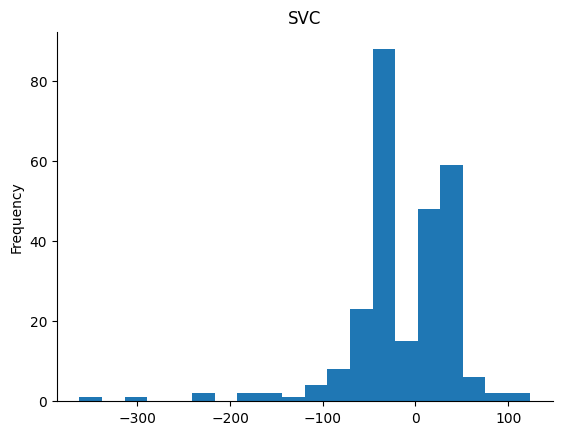

In [ ]:
# #

# from matplotlib import pyplot as plt
# final_svc_vs_stock_df['SVC'].plot(kind='hist', bins=20, title='SVC')
# plt.gca().spines[['top', 'right',]].set_visible(False)

plotting

2019 crypto correlation graphs


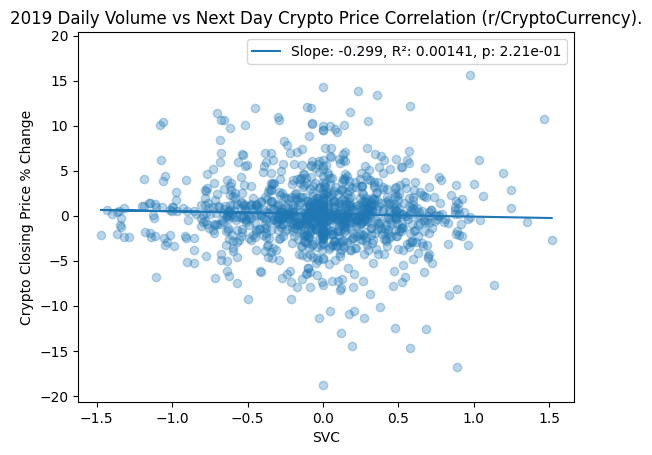

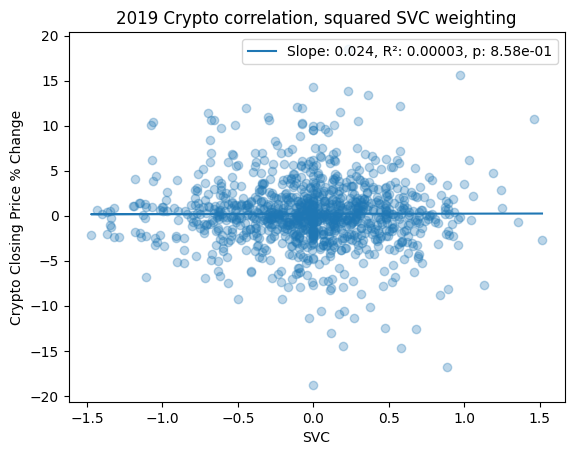






2020 crypto correlation graphs


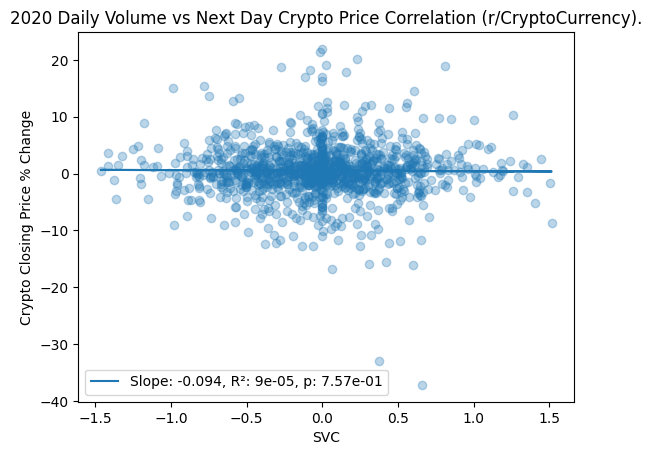

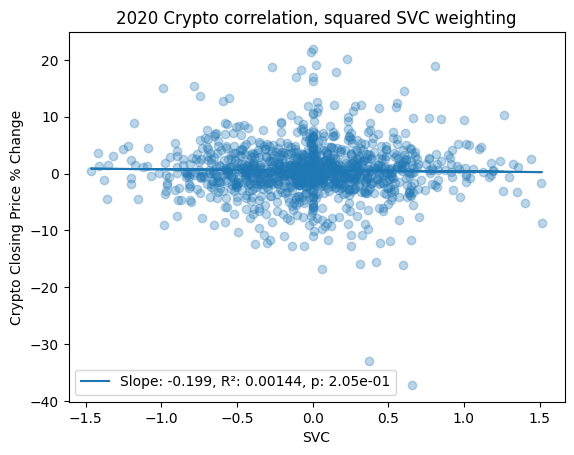






2021 crypto correlation graphs


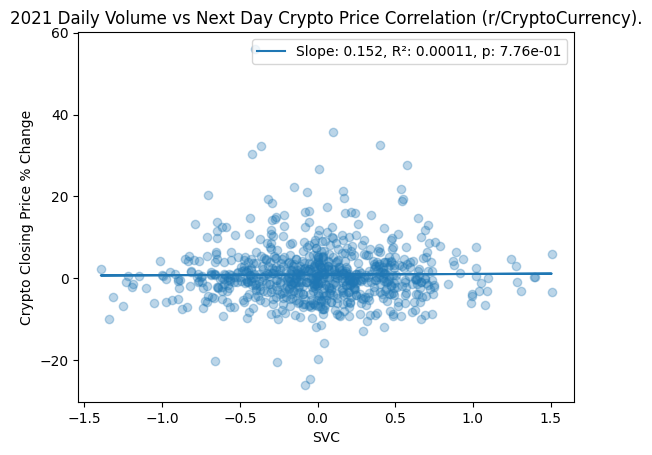

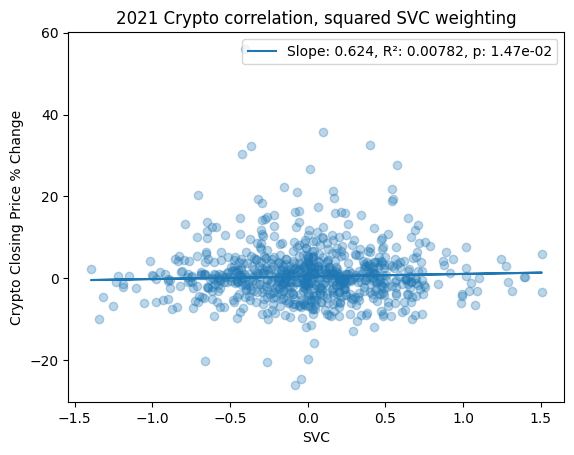






2022 crypto correlation graphs


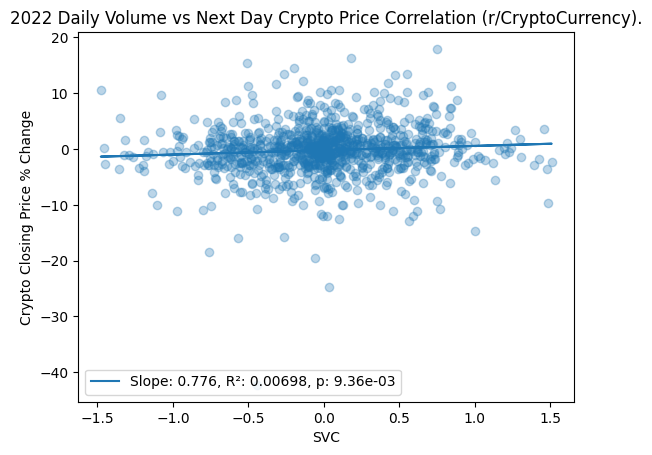

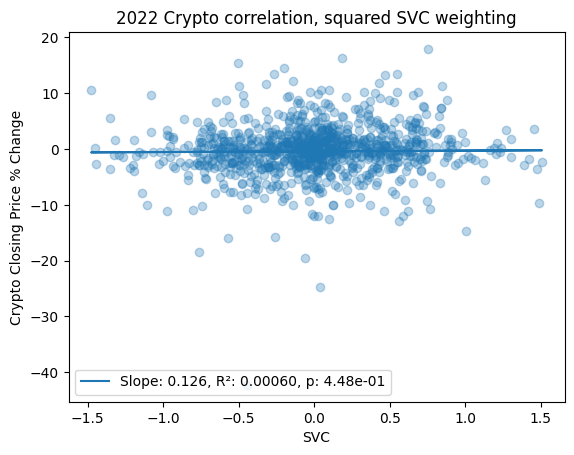






2023 crypto correlation graphs


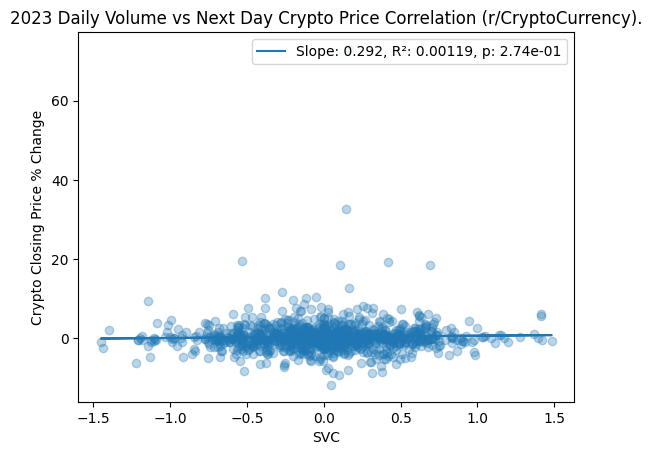

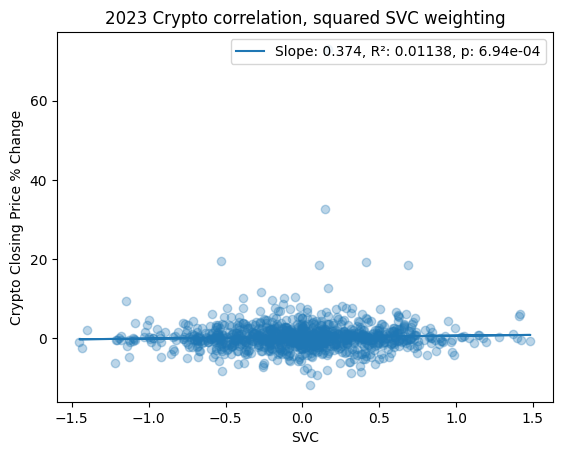






2024 crypto correlation graphs


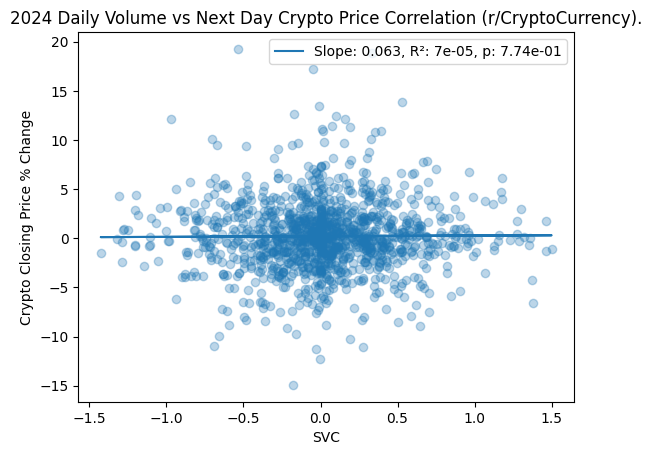

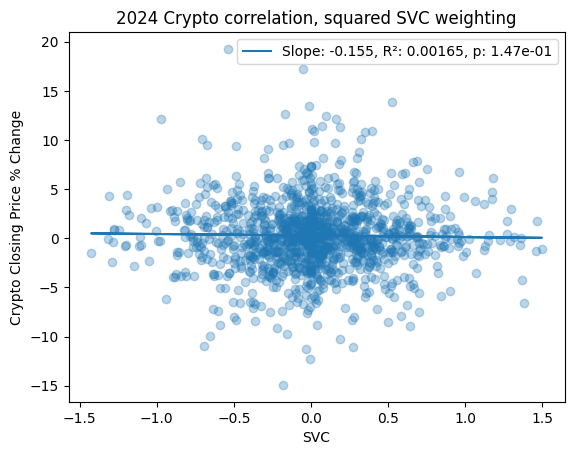






2019-2024 overall crypto correlation graphs


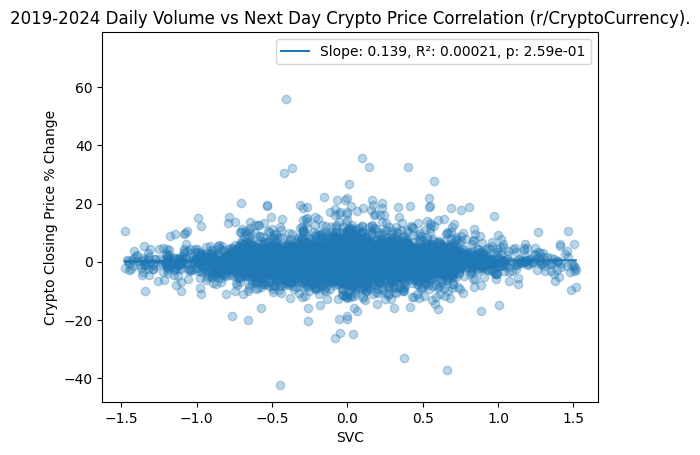

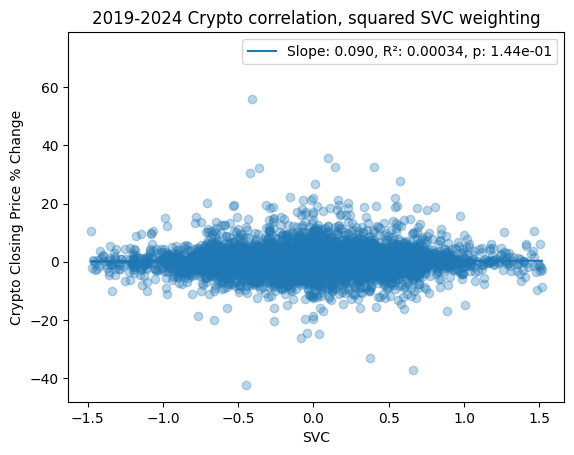

In [ ]:
#correlation by-year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

for year in range(2019, 2025):
  print(f'{year} crypto correlation graphs')
  filtered_svc_vs_stock_df = final_svc_vs_stock_df[(final_svc_vs_stock_df['Date'] >= f"{year}-01-01") & (final_svc_vs_stock_df['Date'] <= f"{year}-12-31")]

  x_values = filtered_svc_vs_stock_df[['SVC']]
  y_values = filtered_svc_vs_stock_df['Close_pct_change']

  model = LinearRegression()
  model.fit(x_values, y_values)

  slope = round(model.coef_[0], 3)
  y_pred = model.predict(x_values)
  r_squared = round(r2_score(y_values, y_pred), 5)

  _, p = sp.pearsonr(filtered_svc_vs_stock_df['SVC'], filtered_svc_vs_stock_df['Close_pct_change'])
  p = f"{p:.2e}"

  plt.scatter(filtered_svc_vs_stock_df['SVC'], filtered_svc_vs_stock_df['Close_pct_change'], alpha=0.3)
  plt.plot(filtered_svc_vs_stock_df['SVC'], y_pred, label=f'Slope: {slope}, R²: {r_squared}, p: {p}')

  plt.xlabel('SVC')
  plt.ylabel('Crypto Closing Price % Change')
  plt.title(f'{year} Daily Volume vs Next Day Crypto Price Correlation (r/CryptoCurrency).')

  plt.legend()
  plt.show()



  weights = (filtered_svc_vs_stock_df['SVC'] ** 2).values #quadratic weighting

  model = LinearRegression()
  model.fit(x_values, y_values, sample_weight=weights)

  slope = model.coef_[0]
  intercept = model.intercept_
  y_pred = model.predict(x_values)

  #have to manually calculate the p-value - python library can't handle weights with p-value
  residuals = y_values - y_pred
  weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
  weighted_variance = np.sum(weights * (x_values.values.flatten() - np.average(x_values.values.flatten(), weights=weights))**2)
  se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
  t_statistic = slope / se_slope
  df = len(x_values) - 2
  p = 2 * (1 - t.cdf(np.abs(t_statistic), df))

  r_squared = r2_score(y_values, y_pred, sample_weight=weights)

  plt.scatter(x_values, y_values, alpha=0.3)
  plt.plot(x_values, y_pred, label=f'Slope: {slope:.3f}, R²: {r_squared:.5f}, p: {p:.2e}')
  plt.xlabel('SVC')
  plt.ylabel('Crypto Closing Price % Change')
  plt.title(f'{year} Crypto correlation, squared SVC weighting')
  plt.legend()
  plt.show()

  print("\n\n\n\n")

print("2019-2024 overall crypto correlation graphs")
x_values = final_svc_vs_stock_df[['SVC']]
y_values = final_svc_vs_stock_df['Close_pct_change']

model = LinearRegression()
model.fit(x_values, y_values)

slope = round(model.coef_[0], 3)
y_pred = model.predict(x_values)
r_squared = round(r2_score(y_values, y_pred), 5)

_, p = sp.pearsonr(final_svc_vs_stock_df['SVC'], final_svc_vs_stock_df['Close_pct_change'])
p = f"{p:.2e}"

plt.scatter(final_svc_vs_stock_df['SVC'], final_svc_vs_stock_df['Close_pct_change'], alpha=0.3)
plt.plot(final_svc_vs_stock_df['SVC'], y_pred, label=f'Slope: {slope}, R²: {r_squared}, p: {p}')

plt.xlabel('SVC')
plt.ylabel('Crypto Closing Price % Change')
plt.title('2019-2024 Daily Volume vs Next Day Crypto Price Correlation (r/CryptoCurrency).')

plt.legend()
plt.show()



weights = (final_svc_vs_stock_df['SVC'] ** 2).values #quadratic weighting

model = LinearRegression()
model.fit(x_values, y_values, sample_weight=weights)

slope = model.coef_[0]
intercept = model.intercept_
y_pred = model.predict(x_values)

#have to manually calculate the p-value - python library can't handle weights with p-value
residuals = y_values - y_pred
weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
weighted_variance = np.sum(weights * (x_values.values.flatten() - np.average(x_values.values.flatten(), weights=weights))**2)
se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
t_statistic = slope / se_slope
df = len(x_values) - 2
p = 2 * (1 - t.cdf(np.abs(t_statistic), df))

r_squared = r2_score(y_values, y_pred, sample_weight=weights)

plt.scatter(x_values, y_values, alpha=0.3)
plt.plot(x_values, y_pred, label=f'Slope: {slope:.3f}, R²: {r_squared:.5f}, p: {p:.2e}')
plt.xlabel('SVC')
plt.ylabel('Crypto Closing Price % Change')
plt.title('2019-2024 Crypto correlation, squared SVC weighting')
plt.legend()
plt.show()

print("\n\n\n\n")

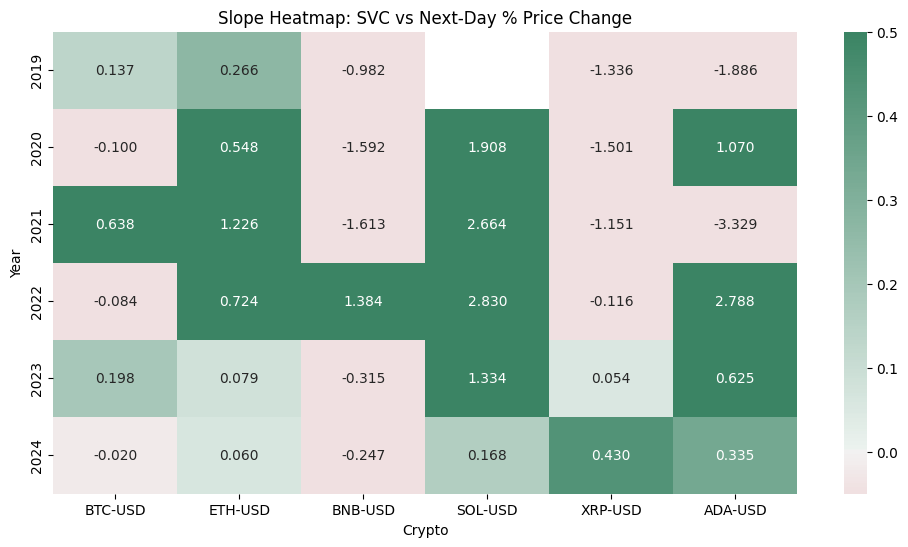

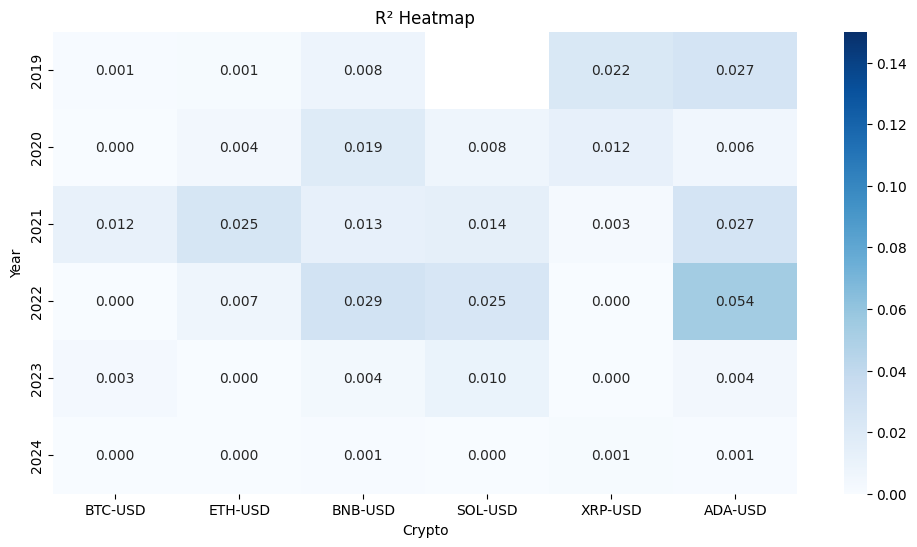

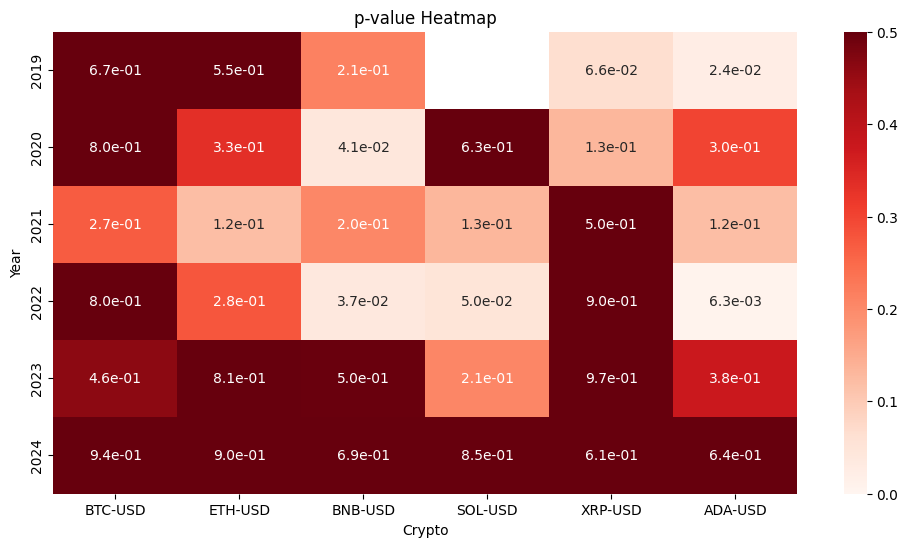

In [ ]:
#unweighted heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as sp

tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD']
years = list(range(2019, 2025))

slope_dict = {}
r2_dict = {}
pval_dict = {}

for ticker in tickers:
    for year in years:
        df = final_svc_vs_stock_df.copy()
        df = df[(df['Date'].dt.year == year) & (df['Ticker'] == ticker)]
        df = df[df['Date'].notna() & df['SVC'].notna() & df['Close_pct_change'].notna()]
        df = df[df['SVC'] != 0]

        if df.empty:
            slope_dict[(year, ticker)] = np.nan
            r2_dict[(year, ticker)] = np.nan
            pval_dict[(year, ticker)] = np.nan
            continue

        x_values = df[['SVC']]
        y_values = df['Close_pct_change']

        model = LinearRegression()
        model.fit(x_values, y_values)
        y_pred = model.predict(x_values)

        slope = model.coef_[0]
        r_squared = r2_score(y_values, y_pred)

        try:
            _, p = sp.pearsonr(x_values.values.flatten(), y_values.values.flatten())
        except:
            p = np.nan

        slope_dict[(year, ticker)] = slope
        r2_dict[(year, ticker)] = r_squared
        pval_dict[(year, ticker)] = p


slope_df = pd.DataFrame(
    [(year, ticker, value) for (year, ticker), value in slope_dict.items()],
    columns=["Year", "Ticker", "Slope"]
).pivot(index="Year", columns="Ticker", values="Slope")

r2_df = pd.DataFrame(
    [(year, ticker, value) for (year, ticker), value in r2_dict.items()],
    columns=["Year", "Ticker", "R2"]
).pivot(index="Year", columns="Ticker", values="R2")

pval_df = pd.DataFrame(
    [(year, ticker, value) for (year, ticker), value in pval_dict.items()],
    columns=["Year", "Ticker", "p_value"]
).pivot(index="Year", columns="Ticker", values="p_value")


slope_df = slope_df[tickers]
r2_df = r2_df[tickers]
pval_df = pval_df[tickers]

plt.figure(figsize=(12, 6))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(
    slope_df,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    center=0,
    vmin=-0.05,
    vmax=0.5
)
plt.title('Slope Heatmap: SVC vs Next-Day % Price Change')
plt.ylabel('Year')
plt.xlabel('Crypto')
plt.show()


plt.figure(figsize=(12, 6))
sns.heatmap(r2_df, annot=True, fmt=".3f", cmap='Blues', vmin=0, vmax=0.15)
plt.title('R² Heatmap')
plt.ylabel('Year')
plt.xlabel('Crypto')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pval_df, annot=True, fmt=".1e", cmap='Reds', vmin=0, vmax=0.5)
plt.title('p-value Heatmap')
plt.ylabel('Year')
plt.xlabel('Crypto')
plt.show()


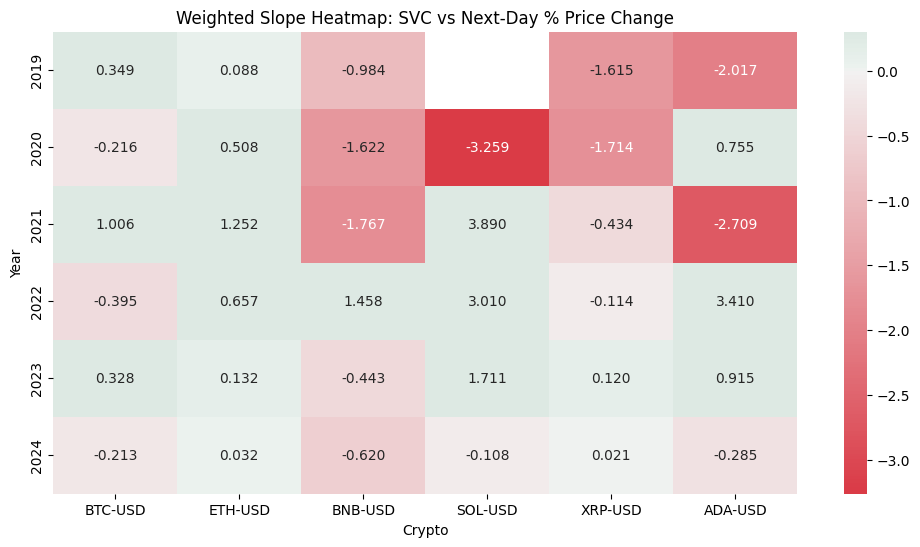

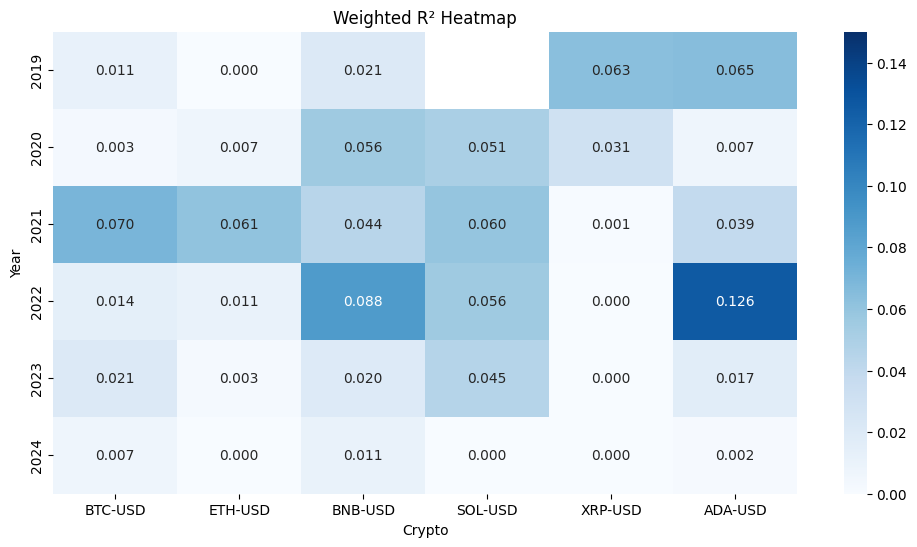

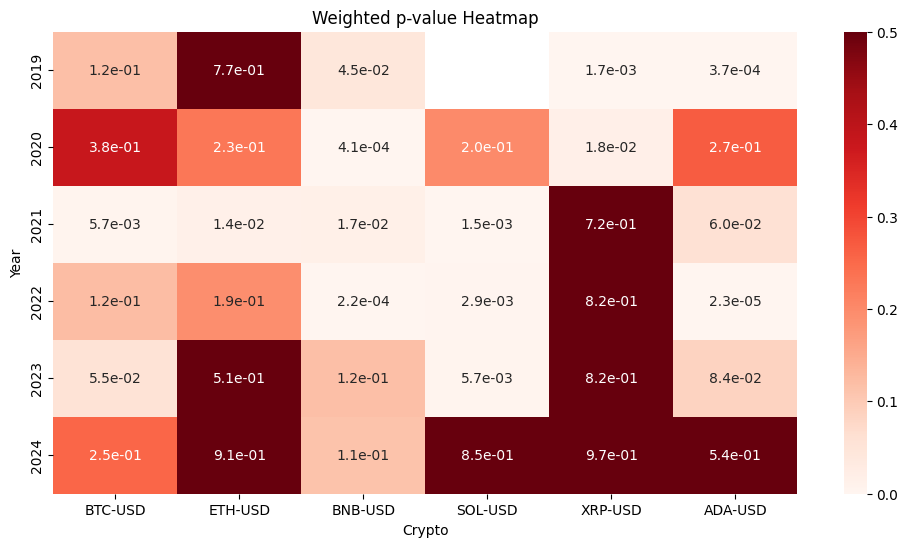

In [ ]:
#weighted heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD']
years = list(range(2019, 2025))

slope_dict = {}
r2_dict = {}
pval_dict = {}

for ticker in tickers:
    for year in years:
        df = final_svc_vs_stock_df.copy()
        df = df[(df['Date'].dt.year == year) & (df['Ticker'] == ticker)]
        df = df[df['Date'].notna() & df['SVC'].notna() & df['Close_pct_change'].notna()]
        df = df[df['SVC'] != 0]

        if df.empty:
            slope_dict[(year, ticker)] = np.nan
            r2_dict[(year, ticker)] = np.nan
            pval_dict[(year, ticker)] = np.nan
            continue

        x_values = df[['SVC']]
        y_values = df['Close_pct_change']
        weights = (df['SVC'].values ** 2)

        model = LinearRegression()
        model.fit(x_values, y_values, sample_weight=weights)
        y_pred = model.predict(x_values)

        slope = model.coef_[0]
        r_squared = r2_score(y_values, y_pred, sample_weight=weights)

        residuals = y_values - y_pred
        x_vals = x_values.values.flatten()
        weighted_residual_sum_of_squares = np.sum(weights * residuals**2)
        weighted_variance = np.sum(weights * (x_vals - np.average(x_vals, weights=weights))**2)
        se_slope = np.sqrt(weighted_residual_sum_of_squares / (weighted_variance * (len(x_values) - 2)))
        t_stat = slope / se_slope
        dfree = len(x_values) - 2
        p = 2 * (1 - t.cdf(np.abs(t_stat), dfree))

        slope_dict[(year, ticker)] = slope
        r2_dict[(year, ticker)] = r_squared
        pval_dict[(year, ticker)] = p

def make_df(d):
    df = pd.DataFrame([(year, ticker, value) for (year, ticker), value in d.items()],
                      columns=["Year", "Ticker", "Value"])
    df = df.pivot(index="Year", columns="Ticker", values="Value")
    return df[tickers]

slope_df = make_df(slope_dict)
r2_df = make_df(r2_dict)
pval_df = make_df(pval_dict)

plt.figure(figsize=(12, 6))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(slope_df, annot=True, fmt=".3f", cmap=cmap, center=0, vmax=0.3)
plt.title('Weighted Slope Heatmap: SVC vs Next-Day % Price Change')
plt.ylabel('Year')
plt.xlabel('Crypto')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(r2_df, annot=True, fmt=".3f", cmap='Blues', vmin=0, vmax=0.15)
plt.title('Weighted R² Heatmap')
plt.ylabel('Year')
plt.xlabel('Crypto')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pval_df, annot=True, fmt=".1e", cmap='Reds', vmin=0, vmax=0.5)
plt.title('Weighted p-value Heatmap')
plt.ylabel('Year')
plt.xlabel('Crypto')
plt.show()